<a href="https://colab.research.google.com/github/sathyadithyarithi/ITI103_myClasswork/blob/main/Telecom_Churn_EDA_Sathyabama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Module IT105 project - Telecom Churn Prediction
###Name : Sathyabama
#### Student id: 9205504F


## Project Overview
The objective is to predict customer churn in a telecommunications company. Customer churn refers to customer leaving the telecommunications. In the longe run, loosing customers  significantly impact a company's revenue. By predicting which customers are likely to churn, the company can take proactive measures to retain them.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv("/content/drive/MyDrive/dataset/Copy of telcom_churn_large.csv")

## Exploratory Data Analysis

### 1. Structure Investigation
#####Exploring the general shape of the dataset, as well as the data types of features.

In [4]:
# Show the dimensions of the dataframe
df.shape

(100000, 33)

In [5]:
# Count the instances of dtypes appearing in the dataset
df.dtypes.value_counts()

,count
object,23
int64,6
float64,4


Dataset contains 100000 rows and 33 columns (featues) and datatypes for 23 features are of object, 6 features are of integers and 4 features are of float.

In [6]:
# Visualise non-numeric features
df.select_dtypes(exclude="number").head()

,CustomerID,Country,State,City,Lat Long,Gender,Senior Citizen,Partner,Dependents,Phone Service,...,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Churn Label,Churn Reason
0,7774-OJSXI,United States,California,South Lake Tahoe,"38.911577, -120.106169",Male,No,No,No,Yes,...,Yes,Yes,No,Yes,Yes,One year,Yes,Electronic check,Yes,Poor expertise of phone support
1,2878-DHMIN,United States,California,Sacramento,"38.619049, -121.517552",Male,No,Yes,Yes,Yes,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Electronic check,No,NaN
2,4804-NCPET,United States,California,Clearlake,"38.965804, -122.631779",Male,No,Yes,Yes,Yes,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,No,NaN
3,5006-MXVRN,United States,California,Keyes,"37.555631, -120.911653",Female,No,No,No,Yes,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),No,NaN
4,8216-AZUUZ,United States,California,San Francisco,"37.781304, -122.461522",Female,No,Yes,Yes,Yes,...,No,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,No,NaN


The feature value and data type matches for the non-numerical data

In [7]:
# Check how many unique values each of the non-numerical features has and identify highest frequency of the top value of the feature
df.describe(exclude="number")

,CustomerID,Country,State,City,Lat Long,Gender,Senior Citizen,Partner,Dependents,Phone Service,...,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Churn Label,Churn Reason
count,100000,98003,100000,100000,100000,95131,95288,100000,100000,100000,...,100000,100000,100000,100000,100000,100000,100000,100000,100000,26555
unique,7043,1,1,1129,1652,3,3,2,2,2,...,3,3,3,3,3,3,2,4,2,20
top,2530-FMFXO,United States,California,Los Angeles,"33.720359, -117.733655",Male,No,No,No,Yes,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,No,Attitude of support person
freq,41,98003,100000,4372,100,46795,78283,51520,76868,90423,...,43851,43782,49350,39848,39629,54867,59320,33846,73445,2765


In [8]:
#Check the struture of the numerical features
df.select_dtypes(include="number").head()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV
0,1,96150,38.911577,-120.106169,31,101.949447,3061.394940,1,65,5387
1,1,95833,38.619049,-121.517552,35,21.044041,645.199178,0,30,2334
2,1,95422,38.965804,-122.631779,19,16.683919,366.686109,0,60,4821
3,1,95328,37.555631,-120.911653,39,20.999046,778.858402,0,45,3733
4,1,94118,37.781304,-122.461522,42,106.860101,4308.035884,0,76,3265


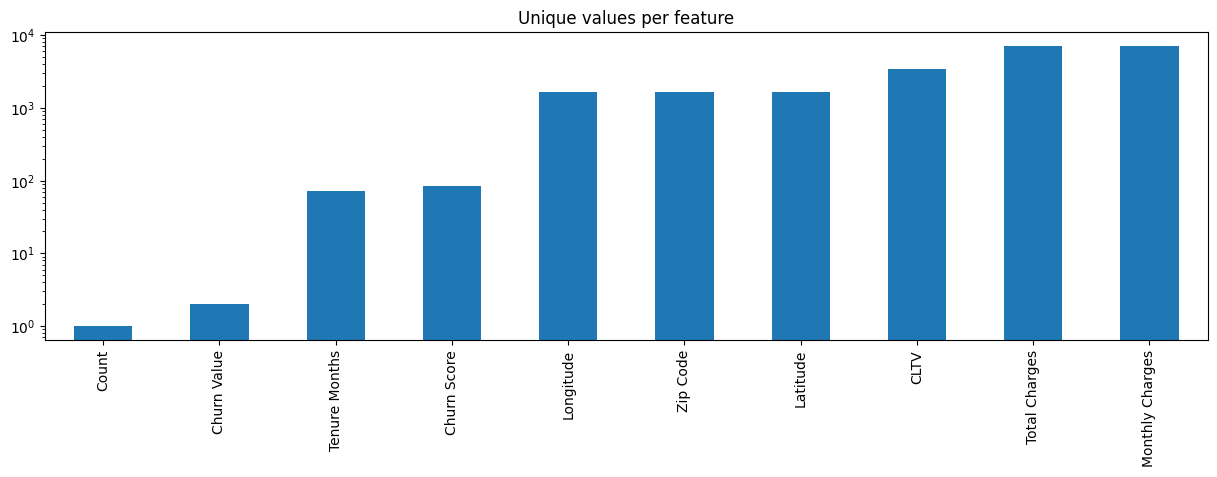

In [9]:
#For each numerical feature compute number of unique entries - to find out binary(1,0) or ordinal or continuous values
unique_values = df.select_dtypes(include="number").nunique().sort_values()

# Plot information with y-axis in log-scale
unique_values.plot.bar(logy=True, figsize=(15, 4), title="Unique values per feature");

### 2. Quality Investigation

The aim is to have overall view on the dataset with regard to quality of data like duplicates, missing values and unwanted entries or recording errors

In [10]:
# Checking for duplicates in data, except Customer ID, same customer could have set up twice?
n_duplicates = df.drop(labels=["CustomerID"], axis=1).duplicated().sum()
print(f"You seem to have {n_duplicates} duplicates in your database.")

You seem to have 92957 duplicates in your database.


In [11]:
#  Extract column names of all features, except 'CustomerID'
columns_to_consider = df.drop(labels=["CustomerID"], axis=1).columns

# Drop duplicates based on 'columns_to_consider'
df = df.drop_duplicates(subset=columns_to_consider)
df.shape

(7043, 33)

/usr/local/lib/python3.10/dist-packages/missingno/missingno.py:61: UserWarning: Plotting a sparkline on an existing axis is not currently supported. To remove this warning, set sparkline=False.
  warnings.warn(


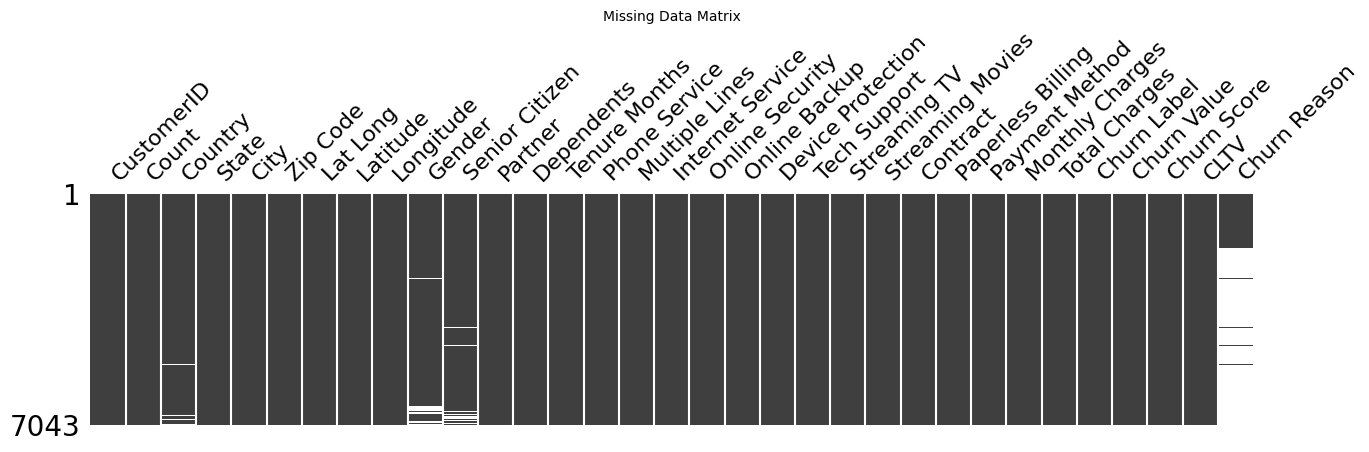

In [12]:
# Get the missing values
import missingno as msno
fig, ax = plt.subplots(figsize=(15, 3))
ax.set_title('Missing Data Matrix', fontsize=10)
msno.matrix(df, labels=True, sort="descending",ax=ax)
plt.show()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 75704
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            6903 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             6708 non-null   object 
 10  Senior Citizen     6709 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 non-

#### Intervention to deal with missing, duplicate and redundant features/values before further analysis

Majority of features in the dataset is object values and the datatypes and values matches. Churn value is binary , but many features, though have binary value, they are represented as Yes or No.


#### Rationale
- There appear to be a substantial number of missing values in 'Churn Reason', as well as some missing values in columns like country, which have been shown to be questionable features in structural analysis (eg.only one value)

- Thus, intervening now to drop these columns will allow us to preserve as many examples as possible when we choose to drop rows with missing values


#### Target Vector
- churn label -> shows a binary yes/no value for our task, whether the customer churns or not.  

- Churn value appear to contain the same information as churn label, as such, will be dropped

#### Duplicate values
Upon investigation of the data, with assumption that the customer id might be unique, the same customer might have joined multiple times to the telco as there is no time period given in the dataset.  it is observerd there are lot of duplicates and the result is only 7043 rows unique.

#### Columns that appear redundant:
- lat long(just latitude and longitude put together, features which are present separately , thus will be dropped)

- country, state -> the only value is california, which is in the US, will be dropped as it does not add merit to analysis

-customerid -> appears to be a unique id that does not correlate with target vector, does not provide information useful for analysis

-zip code -> is not accurate at representing location on a numerical scale, and is inferior to the latitude and logitude features in this regard, thus will be dropped

#### Missing Values

values are notably missing from:
- country(fine because the feature will be dropped as the dataset is only from Uunited States)

- senior citizen (will drop missing data)
  - very important factor in churn
  - number of missing values are not substantial ~5%

- gender (will drop missing data)
  - potentially important
  - number of missing values are not substantial ~5%

- total charges (will drop missing data)
  - highly important for churn status
  - number of rows with missing values is negligible



In [14]:
# Drop the features Country, State, CustomerID, Lat Long , Zip Code, Churn Reason, Churn Value
df.drop(['Country', 'State', 'CustomerID','Lat Long','Zip Code', 'Churn Reason','Churn Value','Count'], axis = 1 , inplace = True)

In [15]:
# Check columnsd
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 75704
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               7043 non-null   object 
 1   Latitude           7043 non-null   float64
 2   Longitude          7043 non-null   float64
 3   Gender             6708 non-null   object 
 4   Senior Citizen     6709 non-null   object 
 5   Partner            7043 non-null   object 
 6   Dependents         7043 non-null   object 
 7   Tenure Months      7043 non-null   int64  
 8   Phone Service      7043 non-null   object 
 9   Multiple Lines     7043 non-null   object 
 10  Internet Service   7043 non-null   object 
 11  Online Security    7043 non-null   object 
 12  Online Backup      7043 non-null   object 
 13  Device Protection  7043 non-null   object 
 14  Tech Support       7043 non-null   object 
 15  Streaming TV       7043 non-null   object 
 16  Streaming Movies   7043 non-

In [16]:
#Dropping missing values as the missing value are not significant
df = df.dropna()

In [17]:
df.describe()

,Latitude,Longitude,Tenure Months,Monthly Charges,Total Charges,Churn Score,CLTV
count,6387.000000,6387.000000,6387.000000,6387.000000,6387.000000,6387.000000,6387.000000
mean,36.274805,-119.793264,32.471270,70.449484,2528.538329,58.737279,4396.638171
std,2.459772,2.158232,24.501364,69.536402,4135.548155,21.468770,1183.127253
min,32.555828,-124.301372,1.000000,2.245156,-2.759953,5.000000,2003.000000
25%,34.028331,-121.805845,9.000000,36.919870,412.976069,41.000000,3462.500000
50%,36.319181,-119.726936,29.000000,71.201022,1422.986490,61.000000,4528.000000
75%,38.208336,-118.038307,55.000000,90.696324,3874.600274,75.000000,5379.000000
max,41.962127,-114.192901,72.000000,1117.904581,84264.101411,100.000000,6500.000000


In [18]:
### to view the distribution . but this can be viewed through Scatterplot and box plot as well
#df.plot(lw=0, marker=".", subplots=True, layout=(-1, 7),
#          figsize=(20, 20), markersize=1)

#### Get a visual idea of the entire dataset for categorical values (how many discrete values are present)

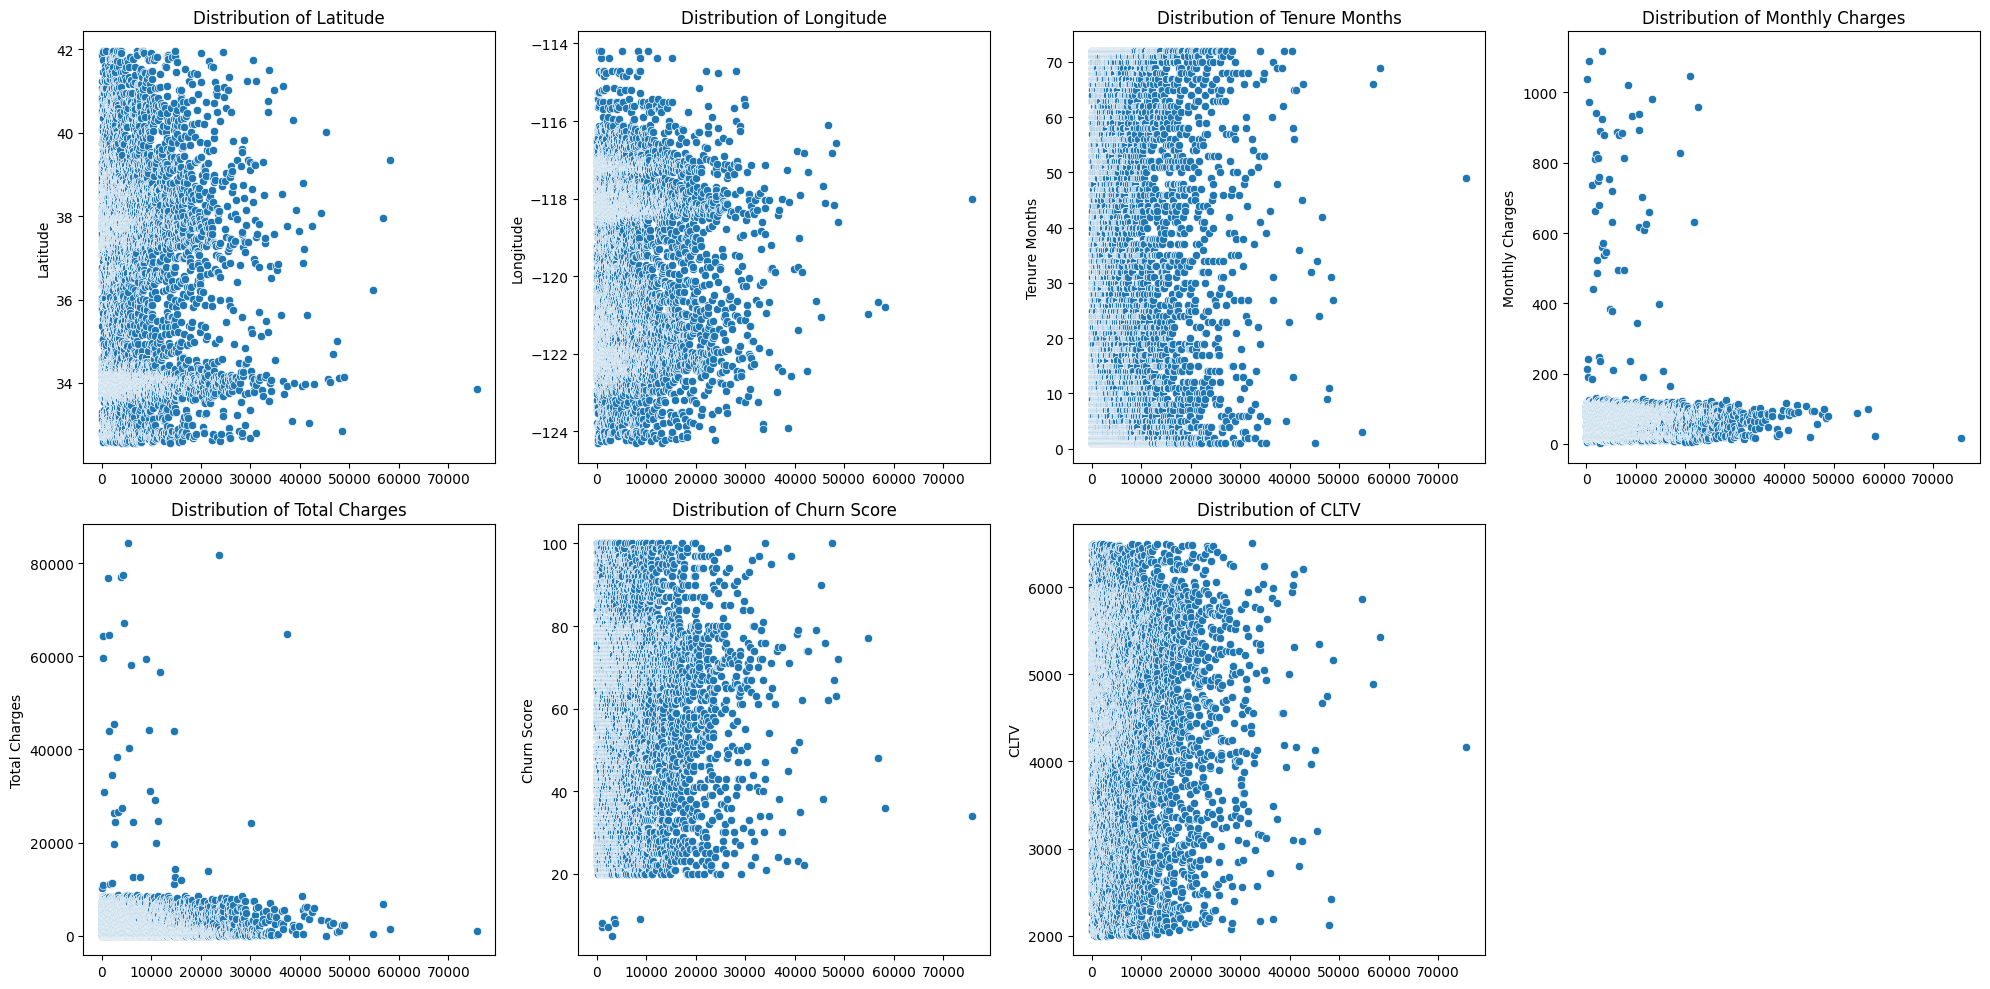

In [19]:
#Get the list of all numeric columns and view through Scattter plot to observe the distribution
num_list = [i for i in df.columns if df[i].dtype != 'object']

num_plots = len(num_list)
rows = (num_plots + 3) // 4  # Calculate the number of rows needed for evenly spaced plots
fig, axes = plt.subplots(rows, 4, figsize=(20, rows * 5))

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot numerical variables
for i, col in enumerate(num_list):
    sns.scatterplot(df[col], ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

for j in range(num_plots, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

My observation from the above is that the feature values are not discrete rather they are continuous

num_plots 7


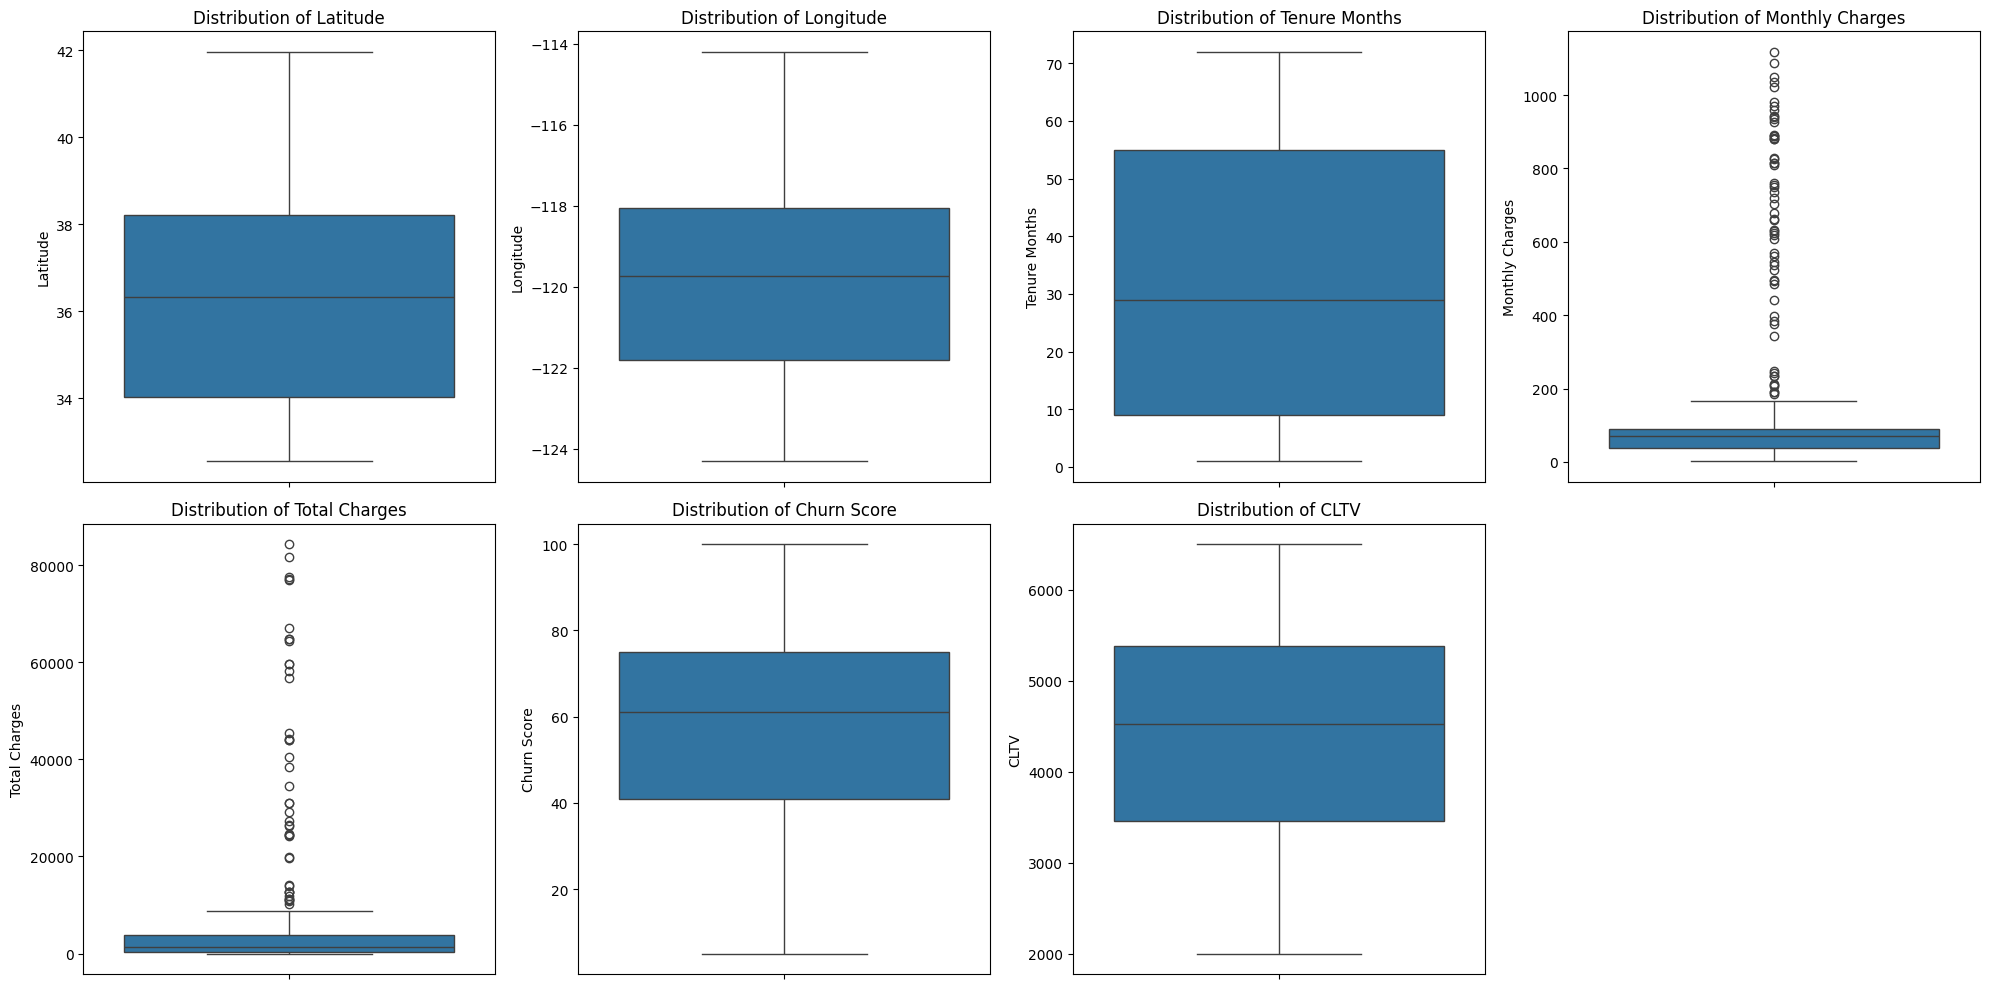

In [20]:
# Next i want to visualize the distribution, spread, and potential outliers of numerical data in my dataset
num_list = [i for i in df.columns if df[i].dtype != 'object']

print("num_plots", len(num_list))
num_plots = len(num_list)
rows = (num_plots + 3) // 4  # Calculate the number of rows needed for evenly spaced plots
fig, axes = plt.subplots(rows, 4, figsize=(20, rows * 5))

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot numerical variables
for i, col in enumerate(num_list):
    sns.boxplot(df[col], ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

for j in range(num_plots, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

My observation is that there are outliers in the Total charges and monthly charges , but i am not excluding now until i see the model performance

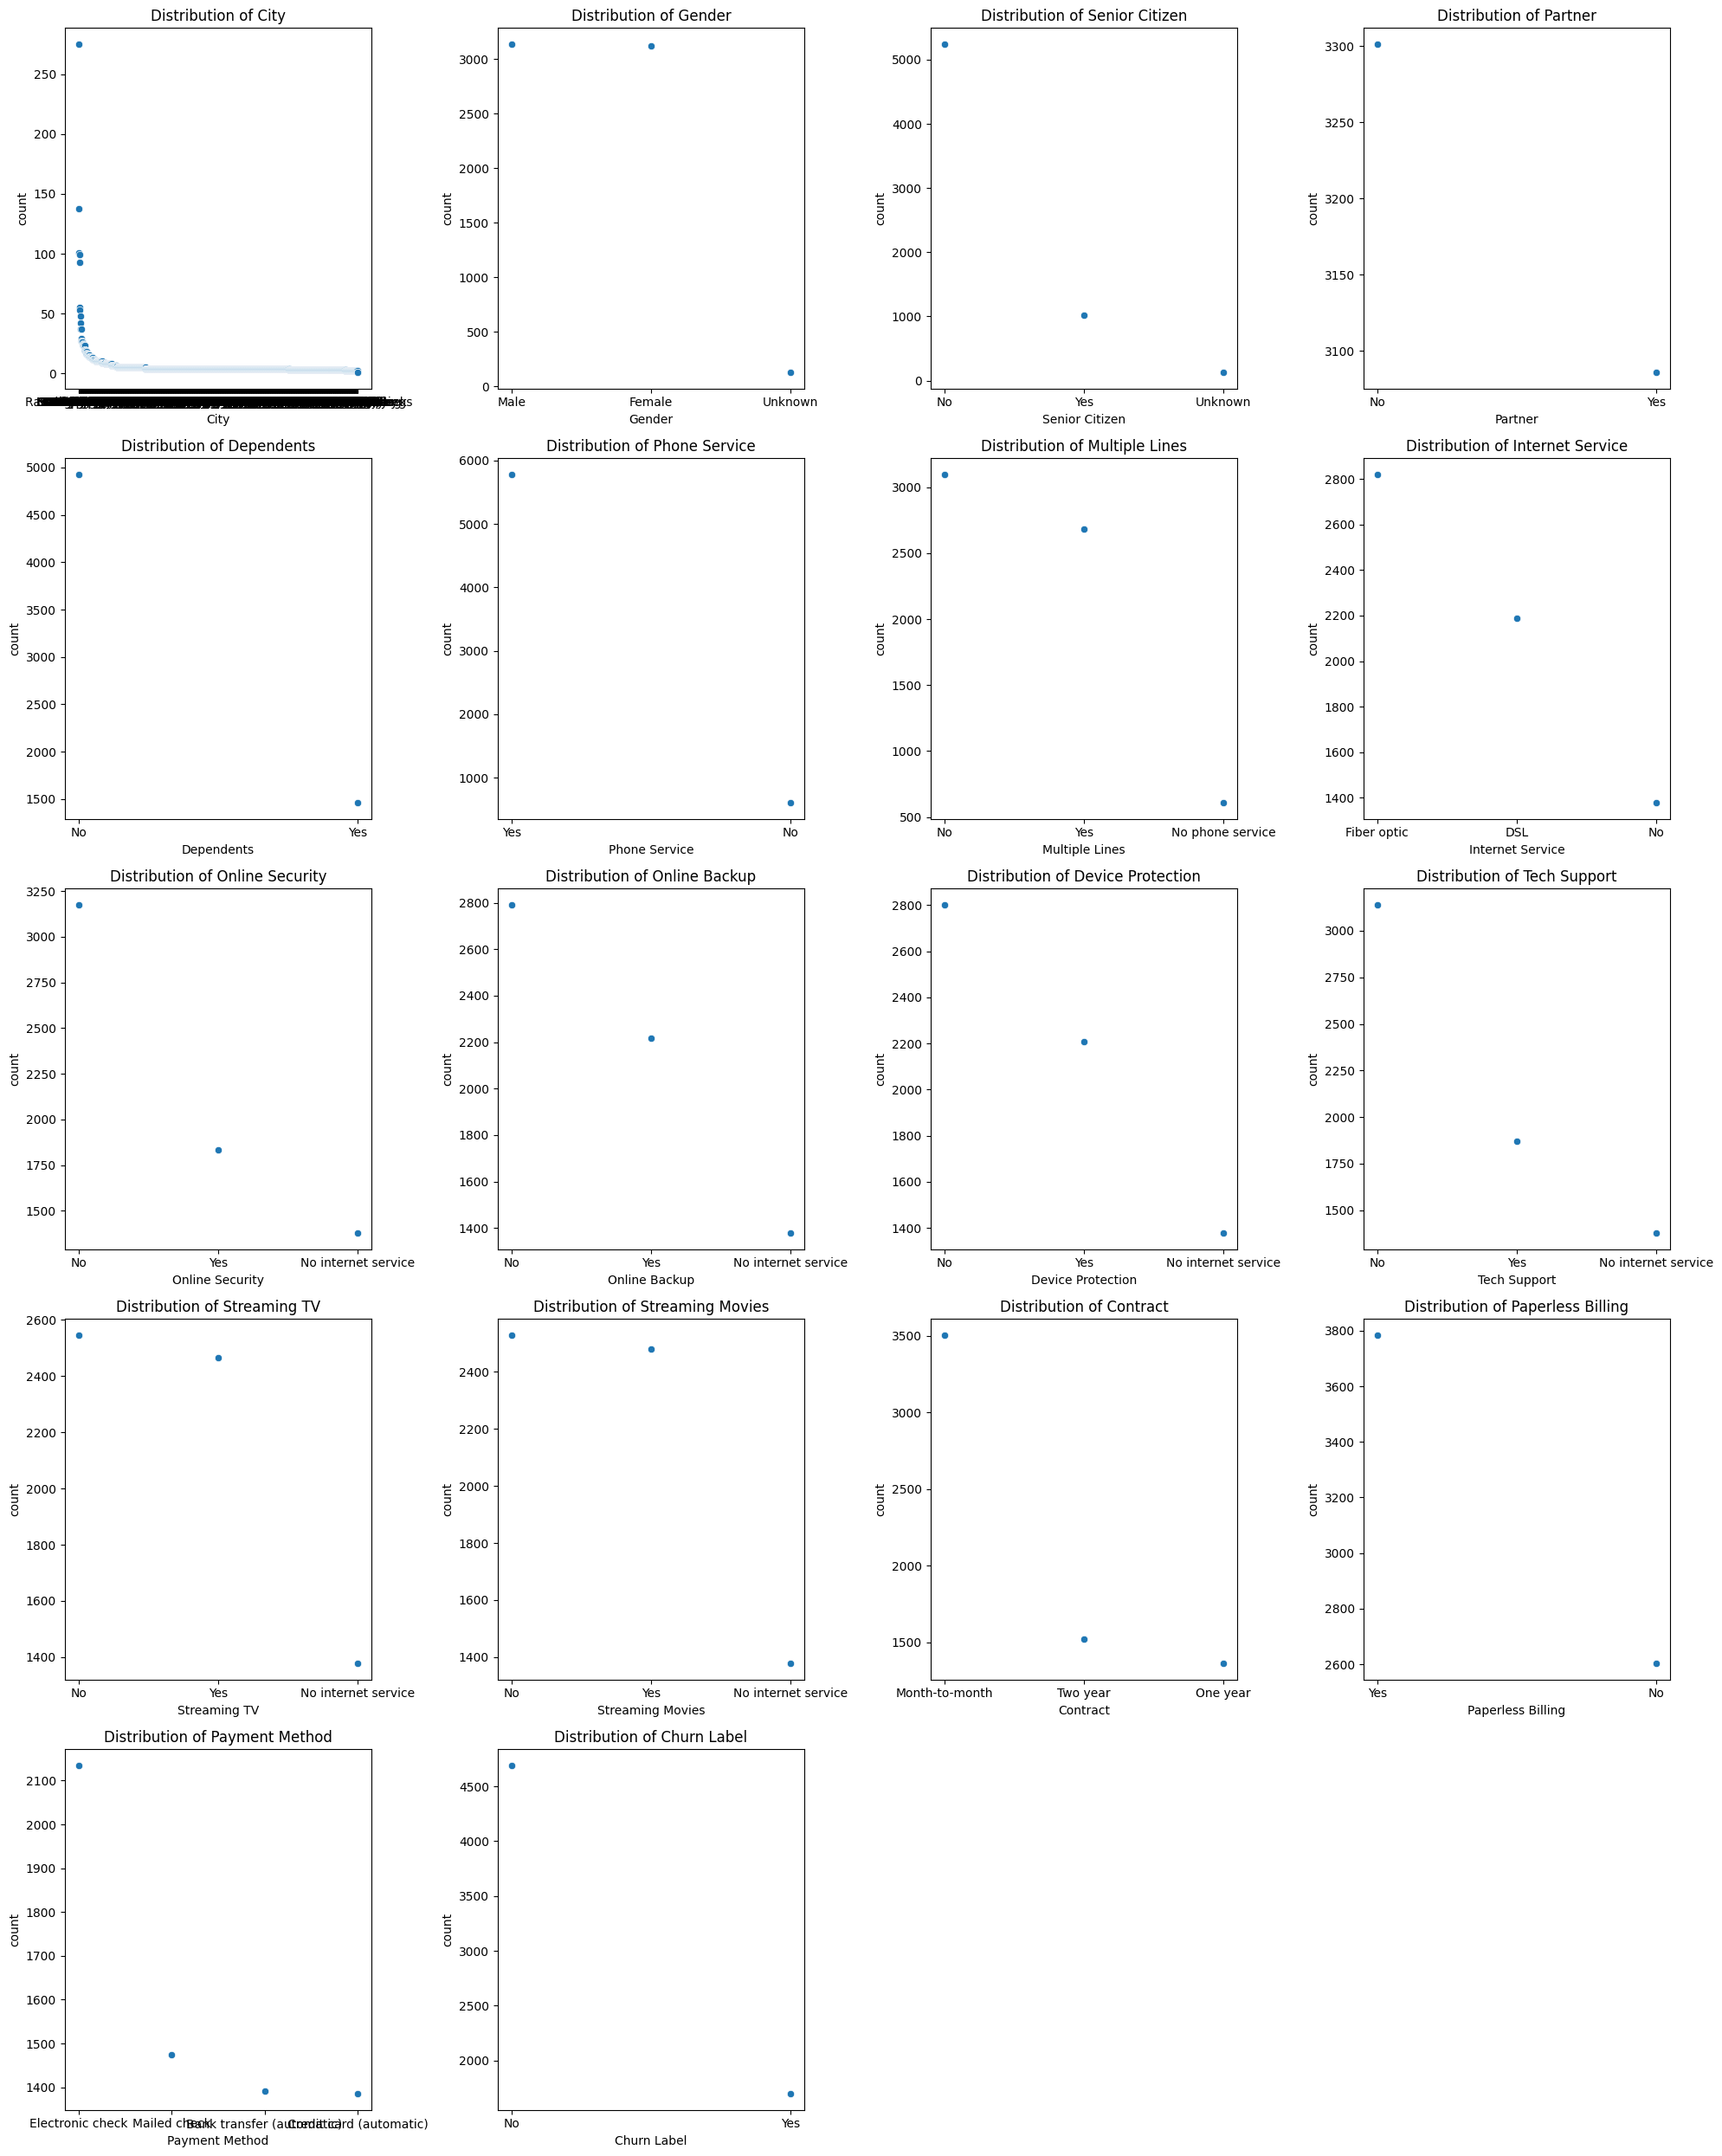

In [25]:
#Get the list of all categorical  columns
cat_list = [i for i in df.columns if df[i].dtype == 'object']

num_plots = len(cat_list)
rows = (num_plots + 3) // 4  # Calculate the number of rows needed for evenly spaced plots
fig, axes = plt.subplots(rows, 4, figsize=(20, rows * 5))

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot Categorical variables
for i, col in enumerate(cat_list):
  sns.scatterplot(df[col].value_counts(),ax=axes[i])
  axes[i].set_title(f'Distribution of {col}')

for j in range(num_plots, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

My observation is that categorical values are discrete and may of them as Yes, No , which intriques me to look at look relatioship of each other with Churn Label

## 3. Content Investigation

#### Univariate Analysis

Feature Distribution - Analysing each variable on its own distribution

<ipython-input-22-4e1520f17394>:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[col], ax=axes[i], palette = 'icefire')
<ipython-input-22-4e1520f17394>:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[col], ax=axes[i], palette = 'icefire')
<ipython-input-22-4e1520f17394>:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[col], ax=axes[i], palette = 'icefire')
<ipython-input-22-4e1520f17394>:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[col], ax=axes[i], palette = 'icefire')
<ipython-input-22-4e1520f17394>:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[col], ax=axes[i], palette = 'icefire')
<ipython-input-22-4e1520f17394>:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[col], ax=axes[i], p

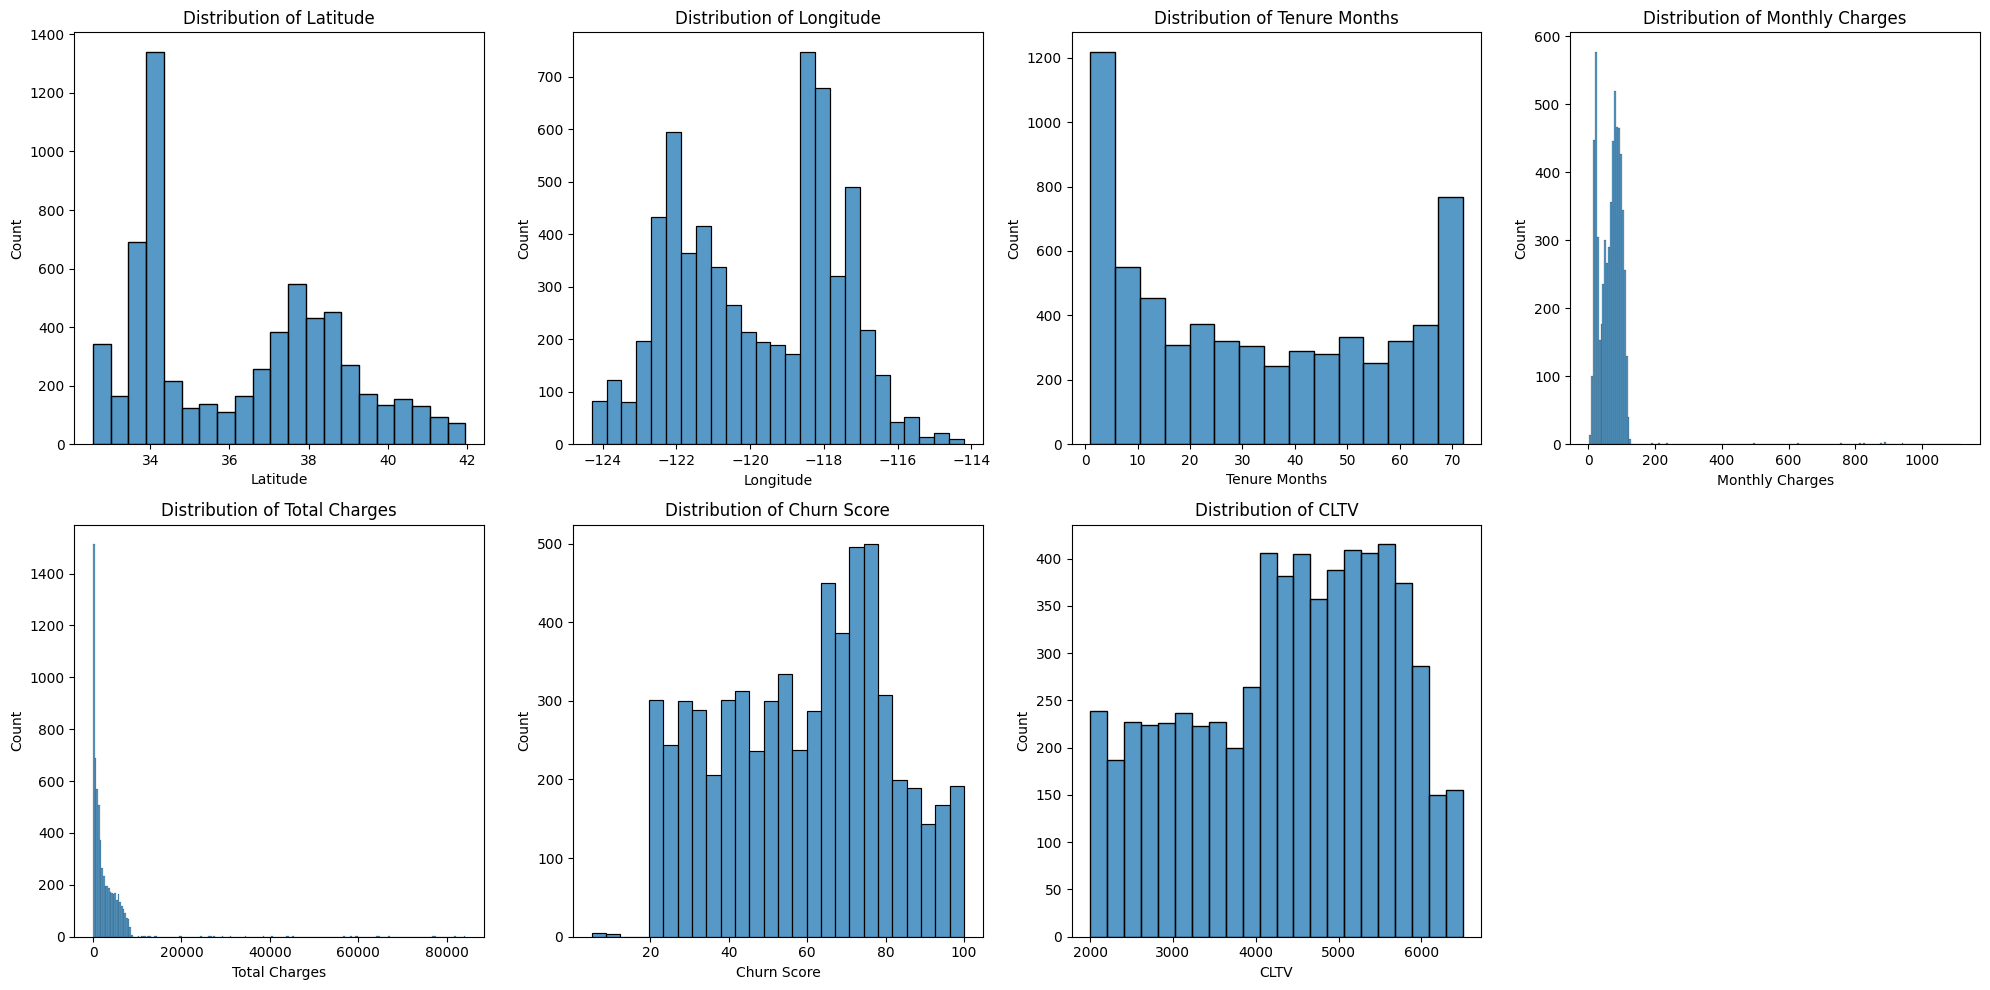

In [22]:
#Get the list of all numeric columns
num_list = [i for i in df.columns if df[i].dtype != 'object']

num_plots = len(num_list)
rows = (num_plots + 3) // 4  # Calculate the number of rows needed for evenly spaced plots
fig, axes = plt.subplots(rows, 4, figsize=(20, rows * 5))

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot numerical variables
for i, col in enumerate(num_list):
    sns.histplot(df[col], ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

for j in range(num_plots, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Observation from Univariate Analysis: Monthly charges and Total charges are skewed left . Both shows outliers.

Otherwise most columns evenly distributed.

#### Bivariate Analysis

##### Numerical features against target vector
Identify the Feature patterns

<ipython-input-37-2dde522df104>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = df[col],y= df['Churn Label'] ,ax=axes[i],palette = 'icefire')
<ipython-input-37-2dde522df104>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = df[col],y= df['Churn Label'] ,ax=axes[i],palette = 'icefire')
<ipython-input-37-2dde522df104>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = df[col],y= df['Churn Label'] ,ax=axes[i],palette = 'icefire')
<ipython-input-37-2dde522df104>:13: FutureWarning: 

Passing `palette` without assigning `hue` is depre

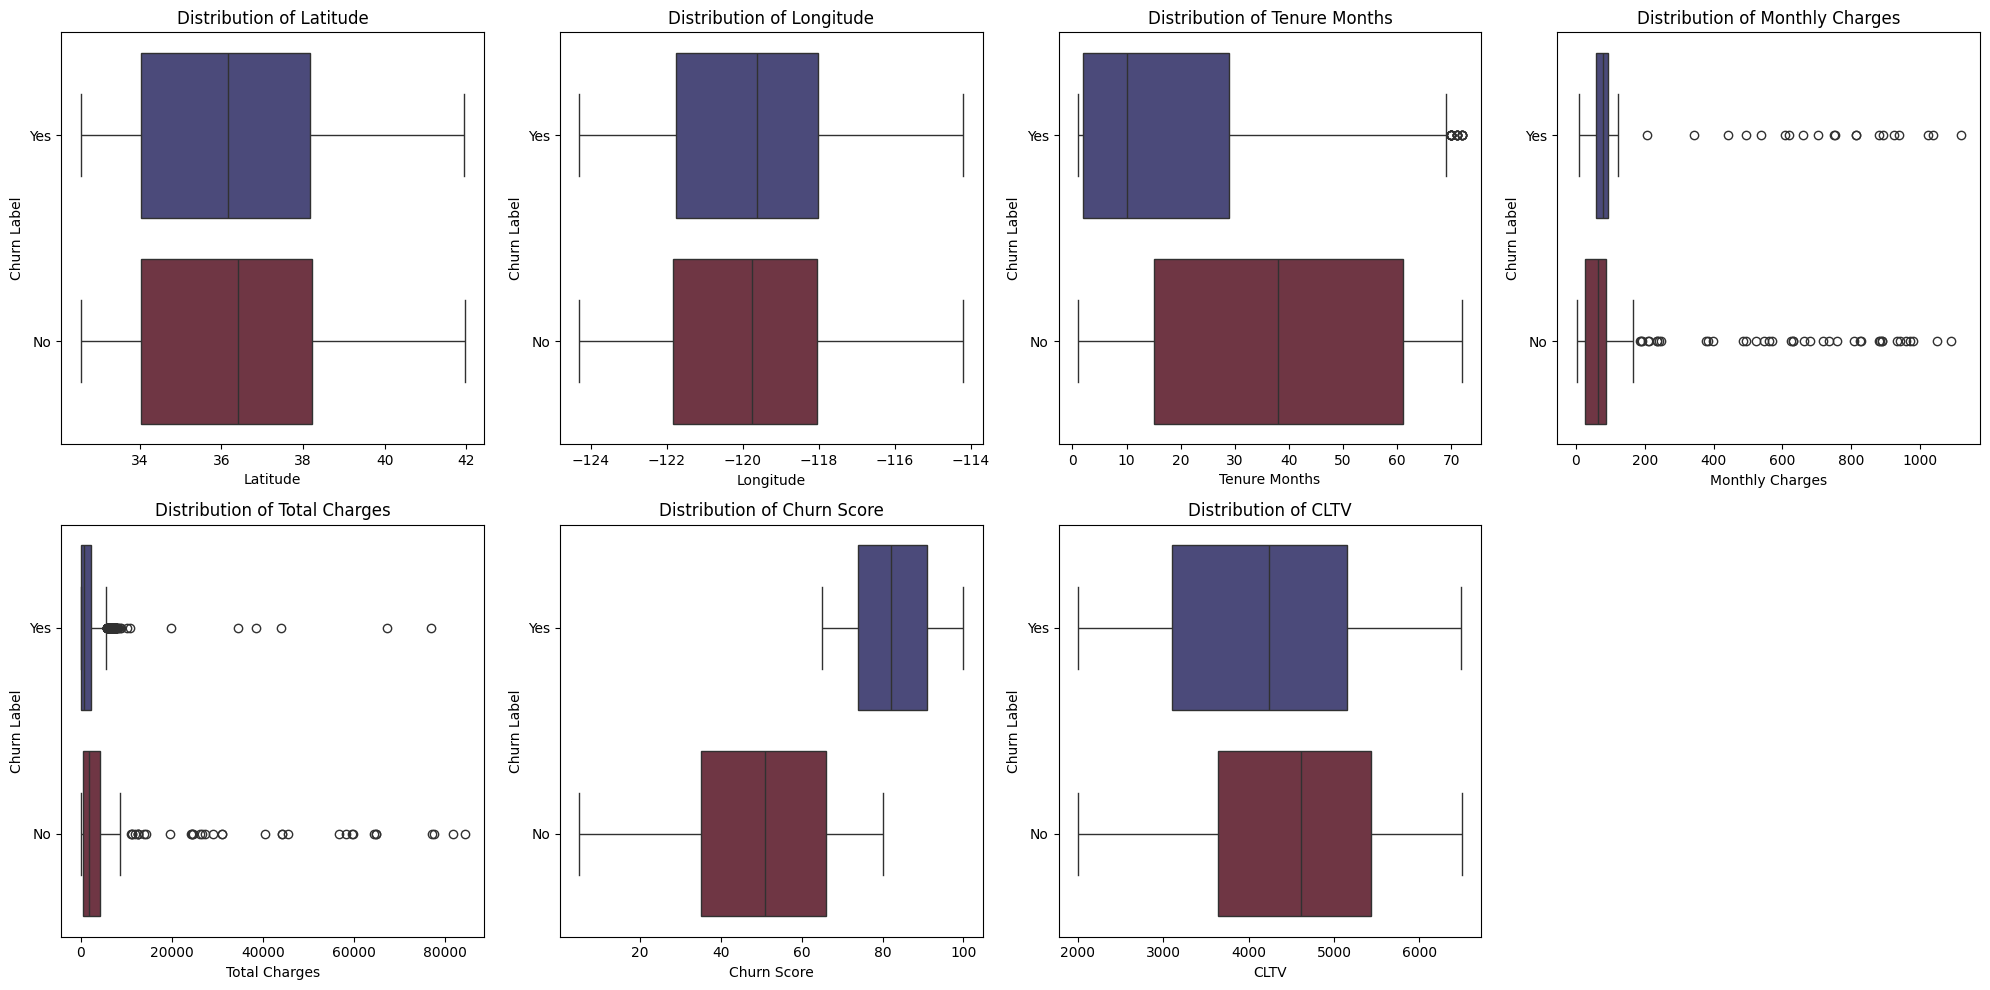

In [37]:
#Get the list of all numeric columns
num_list = [i for i in df.columns if df[i].dtype != 'object']

num_plots = len(num_list)
rows = (num_plots + 3) // 4  # Calculate the number of rows needed for evenly spaced plots
fig, axes = plt.subplots(rows, 4, figsize=(20, rows * 5))

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot numerical variables
for i, col in enumerate(num_list):
    sns.boxplot(x = df[col],y= df['Churn Label'] ,ax=axes[i],palette = 'icefire')
    axes[i].set_title(f'Distribution of {col}')

for j in range(num_plots, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

##### Numerical features against each other

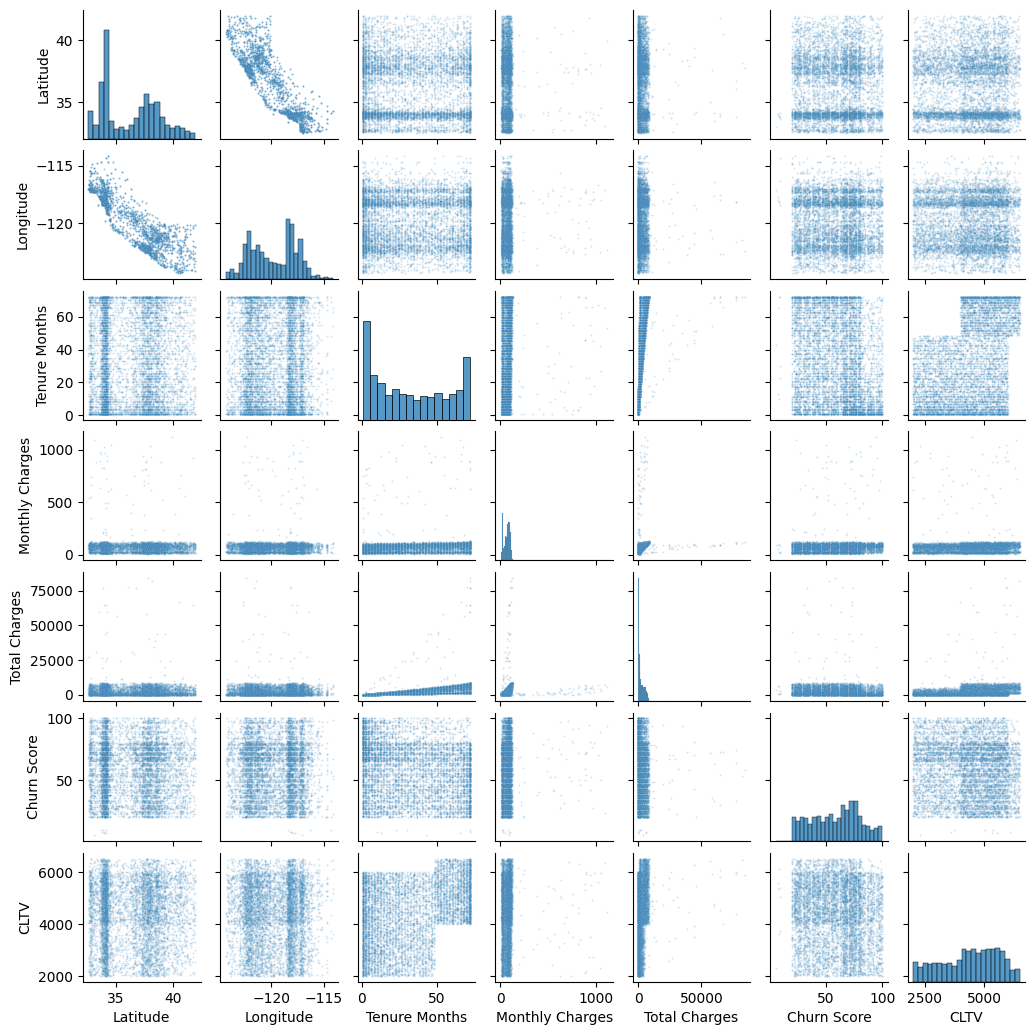

In [24]:
sns.pairplot((df[num_list]), height=1.5, plot_kws={"s": 2, "alpha": 0.2})

In [28]:
# Computes feature correlation
df_corr = df[num_list].corr(method="pearson")

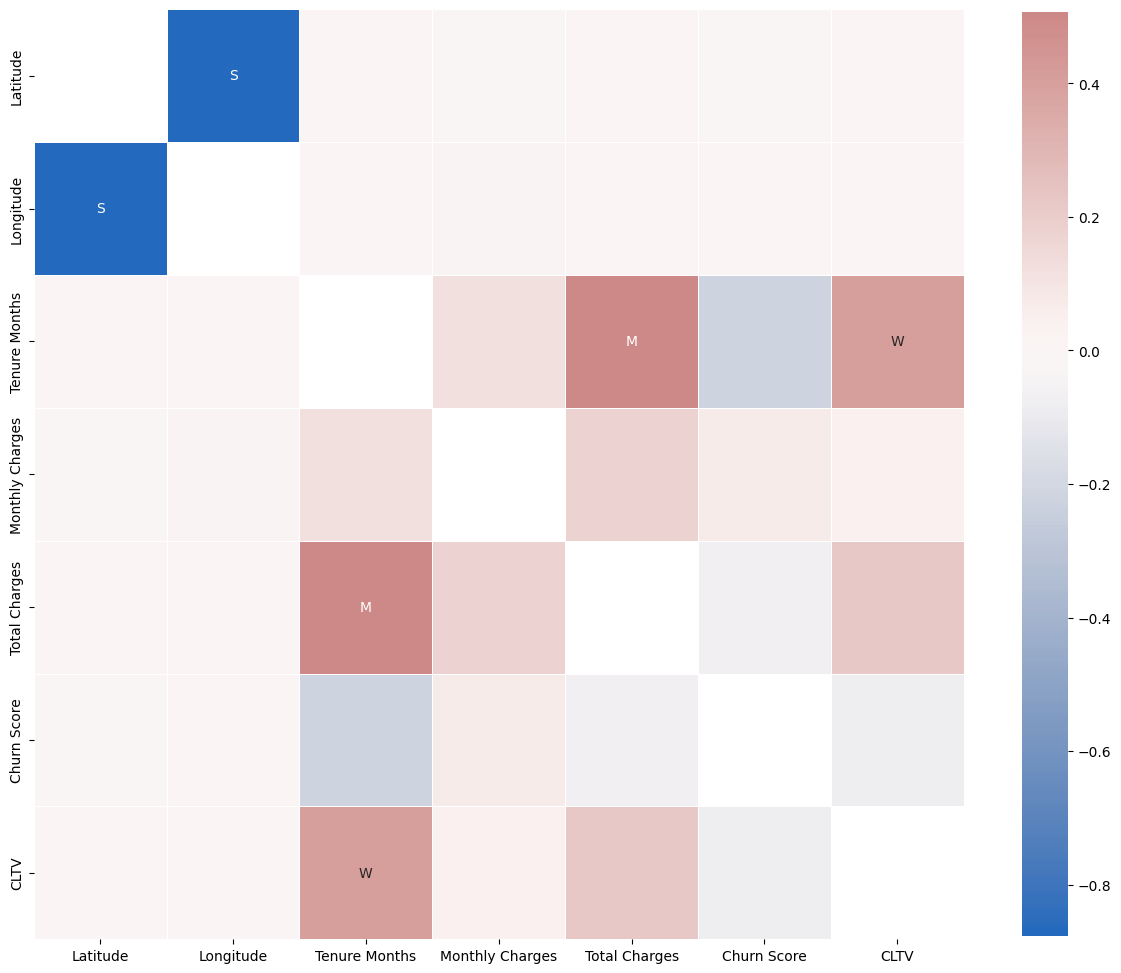

In [38]:
# Create labels for the correlation matrix
labels = np.where(np.abs(df_corr)>0.75, "S",
                  np.where(np.abs(df_corr)>0.5, "M",
                           np.where(np.abs(df_corr)>0.25, "W", "")))

# Plot correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(df_corr, mask=np.eye(len(df_corr)), square=True,
            center=0, annot=labels, fmt='', linewidths=.5,
            cmap="vlag", cbar_kws={"shrink": 0.8});

As we can see, there is hardly any intercorrelation between variables except for between latitude and longitude. The correlation between latitude and longitude is unconcerning as we know from contexual knowledge that they are independent of one another

##### Bivariate analysis with categorical features

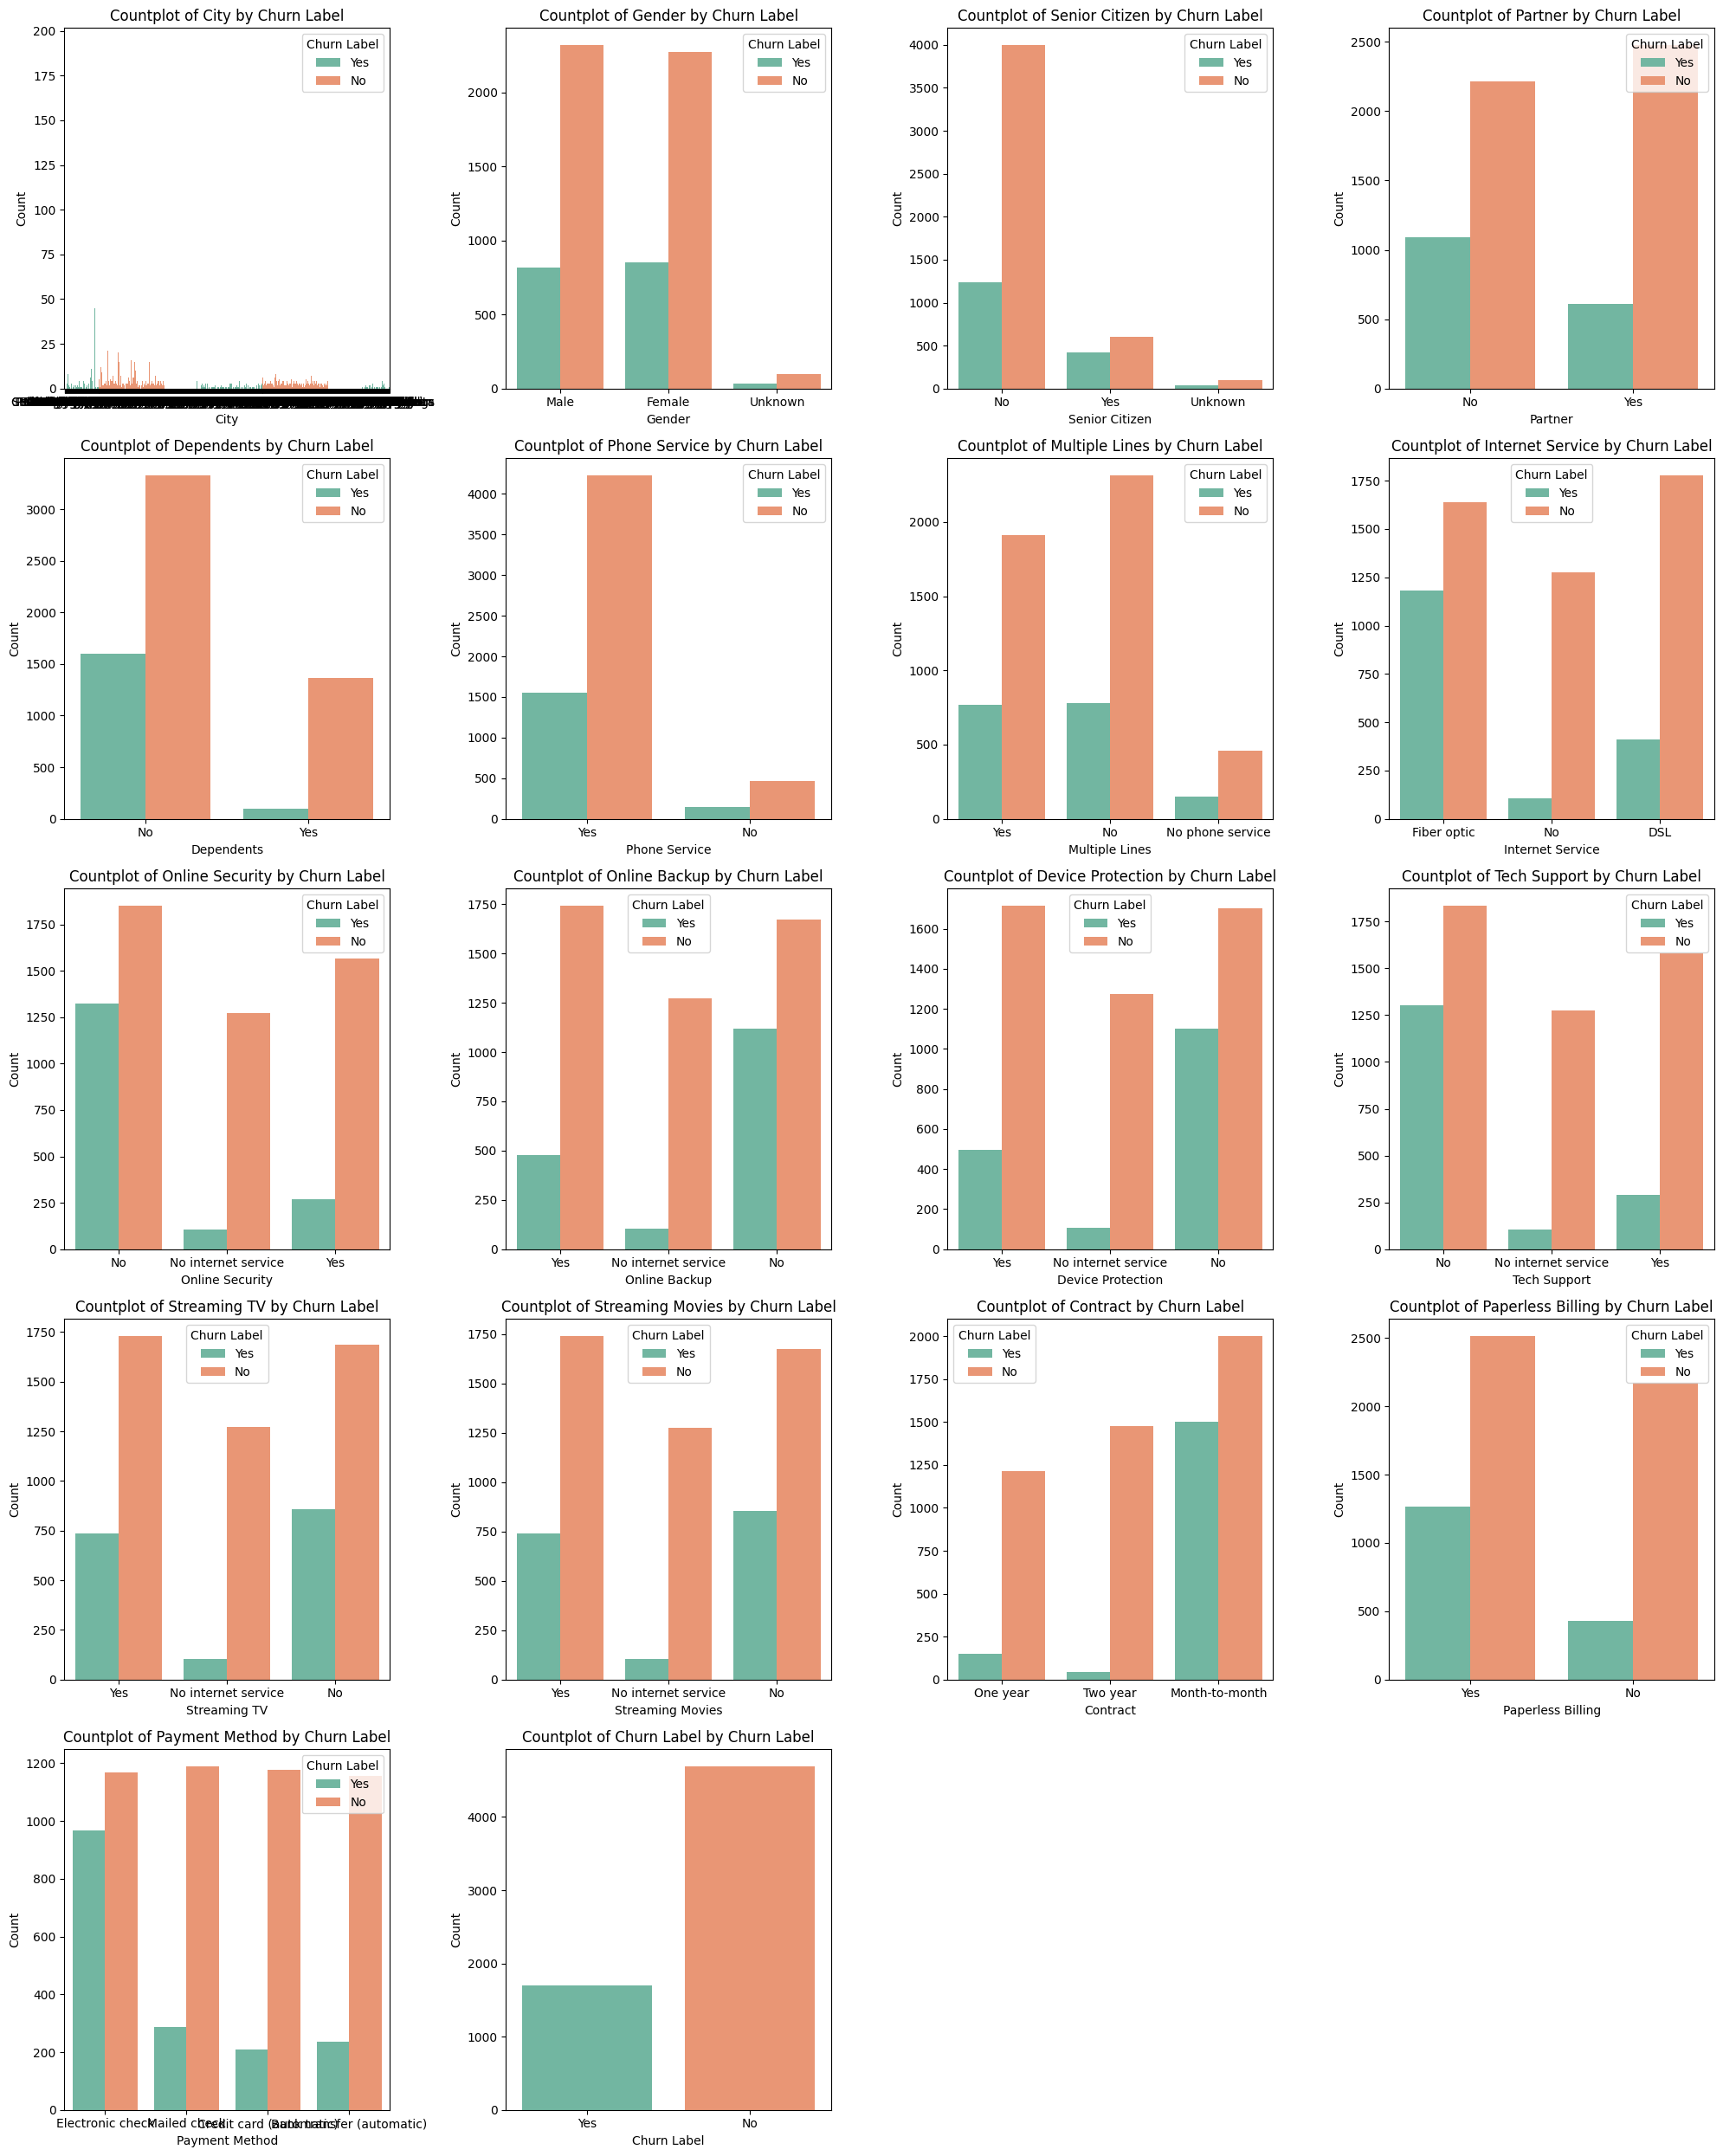

In [33]:
target_variable = 'Churn Label'

# Number of plots
num_plots = len(cat_list)
rows = (num_plots + 3) // 4  # Calculate the number of rows needed

# Create subplots
fig, axes = plt.subplots(rows, 4, figsize=(20, rows * 5))

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot categorical variables against the target variable
for i, col in enumerate(cat_list):
    sns.countplot(x=col, hue=target_variable, data=df, ax=axes[i], palette='Set2')
    axes[i].set_title(f'Countplot of {col} by {target_variable}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Remove any unused subplots
for j in range(num_plots, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### Inference from Bivariate analysis for Target variable
* Gender  has no impact
* City has no impact
* Payment method ( Electronic Check ) seems to have higher Churn Label
* Customer with internet service ( Fiber optic ) has higher Churn label
* Customer with internet service has higher Churn label
* Senior Citizen - not much corrlation with Churn Label
* Multiple lines - has equal Churn Label and not significant correlation
* Contract  - customer with Month-to-Month population is more and proportionately churn is more.
* Tech Support - This is related to the customer experience and may impact the churn

Bivariable analysis provided additional to dig into the detailed analysis of distribution of data -for sepcific selected set of features - which have Binary values  ( yes/No ).  I have created the visualization below .

Verify distribution of data with charges against the Target feature - Churn
* Phone Service
* Multiple Lines
* Internet Service
* Online Security
* Online Backup
* Tech Support
* Streaming TV
* Streaming Movies
* Payment Method

In [ ]:
# Specify features of interest
selected_features = ["Phone Service", "Multiple Lines", "Internet Service",
                     "Online Security", "Online Backup","Tech Support", "Streaming TV", "Streaming Movies","Payment Method"]

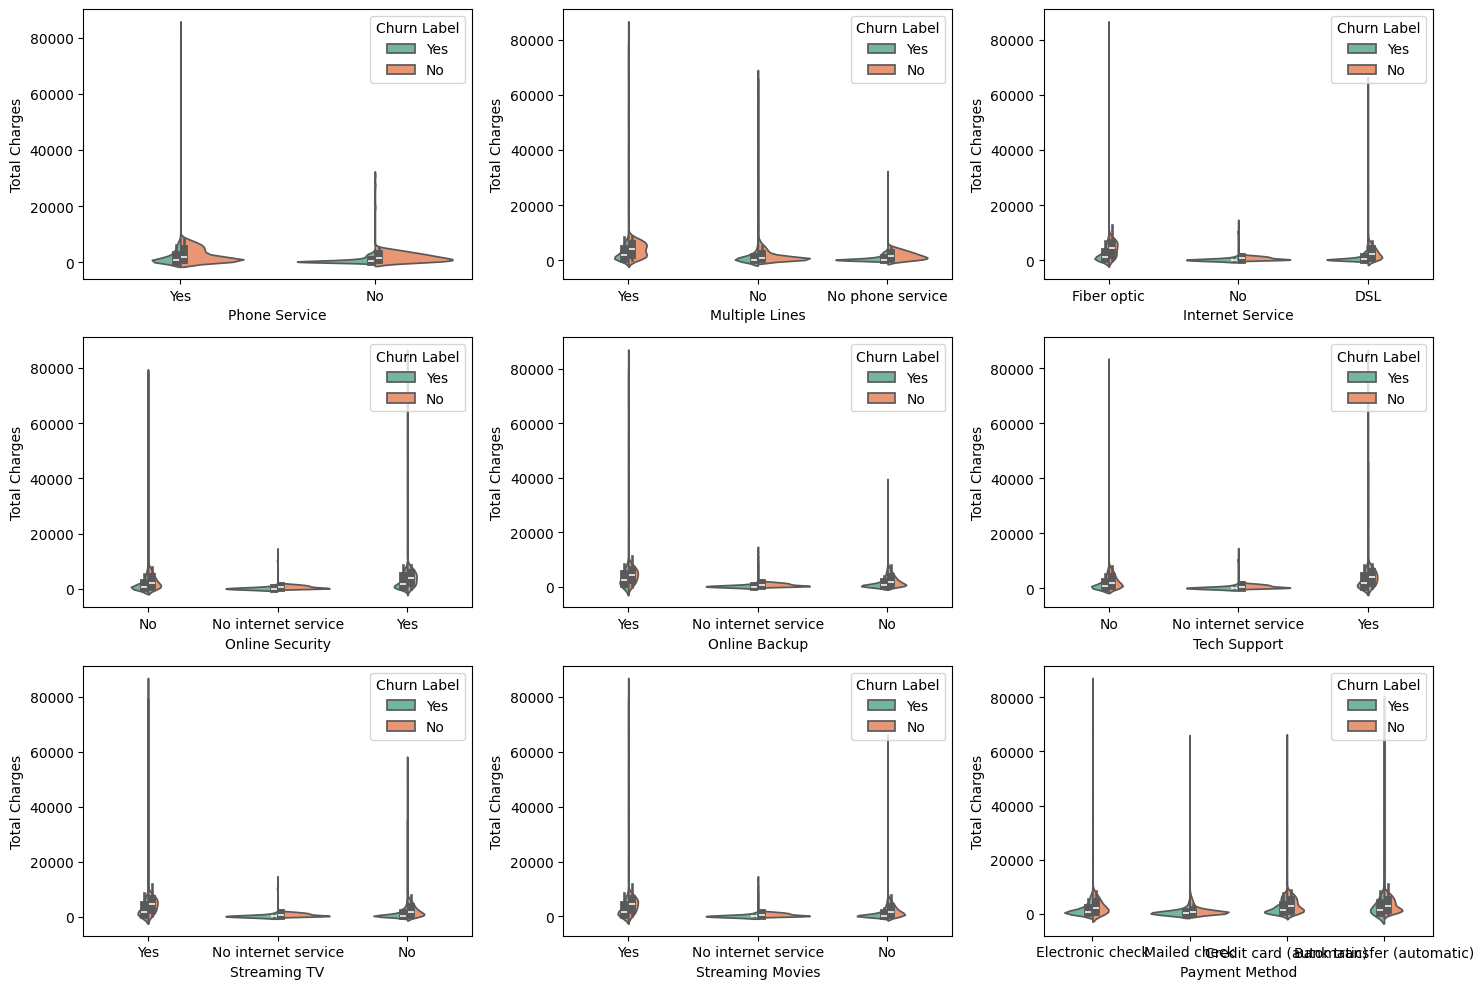

In [55]:
# check density of distribution of the data against the target variable.
fig, axes = plt.subplots(ncols=3, nrows=3, figsize=(15, 10))
# Loop through these features and plot entries from each feature against `Total Charges`
for col, ax in zip(selected_features, axes.ravel()):
    sns.violinplot(data=df, x=col, y=df["Total Charges"], palette="Set2",
                   split=True, hue="Churn Label", ax=ax)
plt.tight_layout();

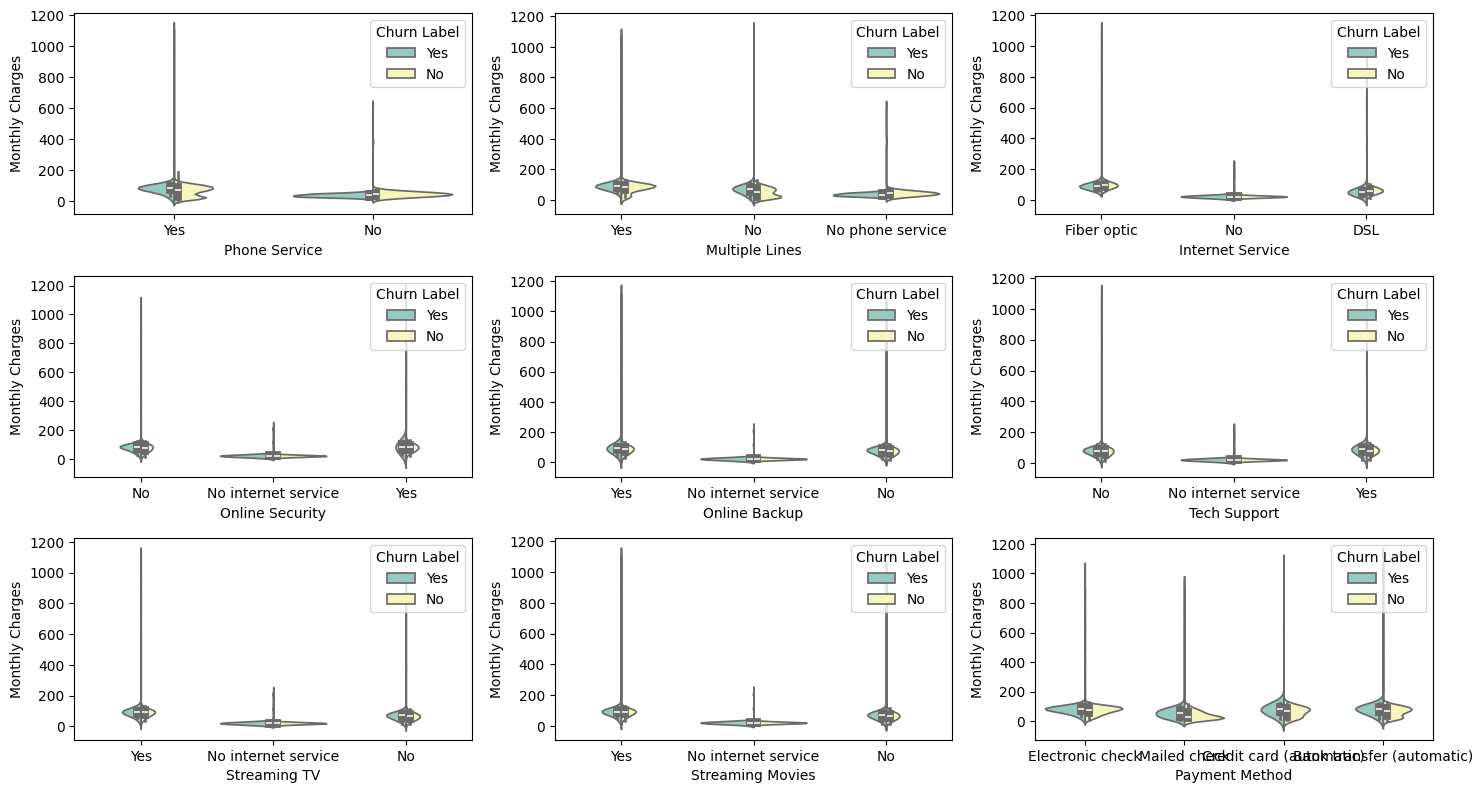

In [60]:
fig, axes = plt.subplots(ncols=3, nrows=3, figsize=(15, 8))

# Loop through these features and plot entries from each feature against `Monthly Charges`
for col, ax in zip(selected_features, axes.ravel()):
    sns.violinplot(data=df, x=col, y=df["Monthly Charges"], palette="Set3",
                   split=True, hue="Churn Label", ax=ax)
plt.tight_layout();

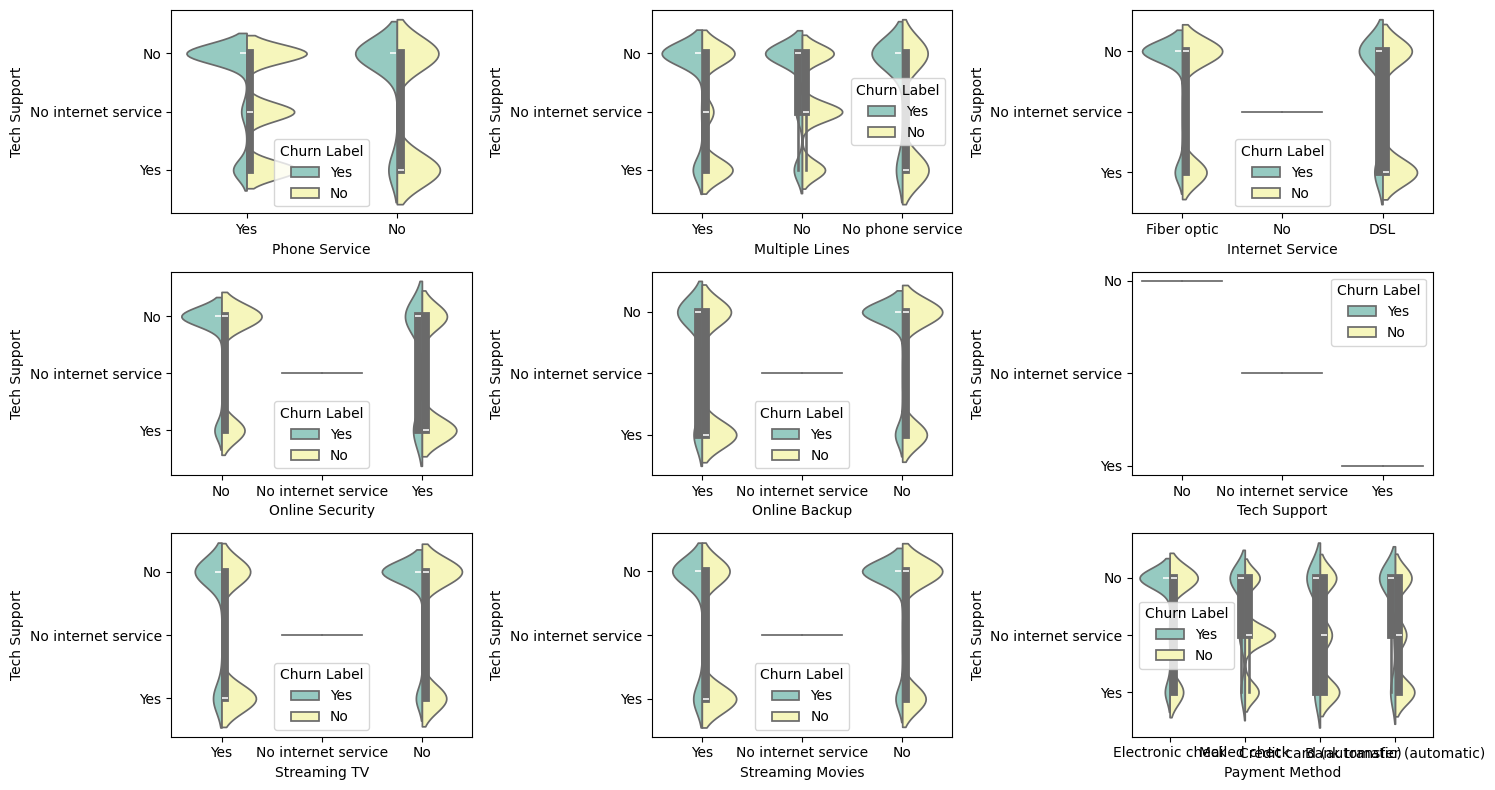

In [59]:
fig, axes = plt.subplots(ncols=3, nrows=3, figsize=(15, 8))

# Loop through these features and plot entries from each feature against `Tech Support`
for col, ax in zip(selected_features, axes.ravel()):
    sns.violinplot(data=df, x=col, y=df["Tech Support"], palette="Set3",
                   split=True, hue="Churn Label", ax=ax)
plt.tight_layout();

Facet Grid: Provides separate plots for different categories.
Observe the spead of data values for all the selected features using Facet Grid

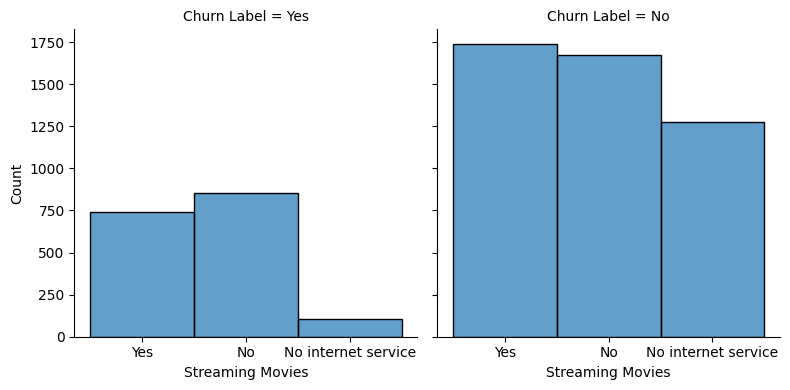

In [67]:
# Facet Grid to plot 'Churn Label' across different 'Streaming Movies'
g = sns.FacetGrid(df, col='Churn Label', height=4, aspect=1)
g.map(sns.histplot, 'Streaming Movies', bins=10, alpha=0.7)
plt.show()

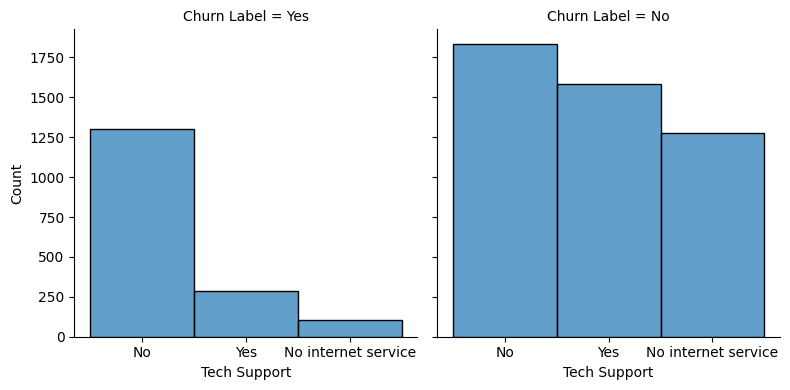

In [73]:
# Facet Grid to plot 'Churn Label' across different 'Tech Support'
g = sns.FacetGrid(df, col='Churn Label', height=4, aspect=1,palette="Set2")
g.map(sns.histplot, 'Tech Support', bins=10, alpha=0.7)
plt.show()

<ipython-input-74-8d6c1380acb9>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Churn Label', y='Tech Support', data=aggregated_data, palette='Set2')


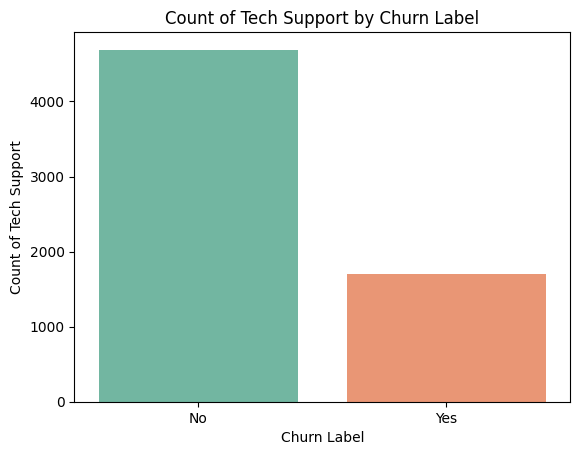

In [74]:
# Aggregate data for combined bar plot
aggregated_data = df.groupby('Churn Label')['Tech Support'].count().reset_index()

# Create a bar plot to show the count of Tech Support by Churn Label
sns.barplot(x='Churn Label', y='Tech Support', data=aggregated_data, palette='Set2')

# Add titles and labels
plt.title('Count of Tech Support by Churn Label')
plt.xlabel('Churn Label')
plt.ylabel('Count of Tech Support')

# Show the plot
plt.show()

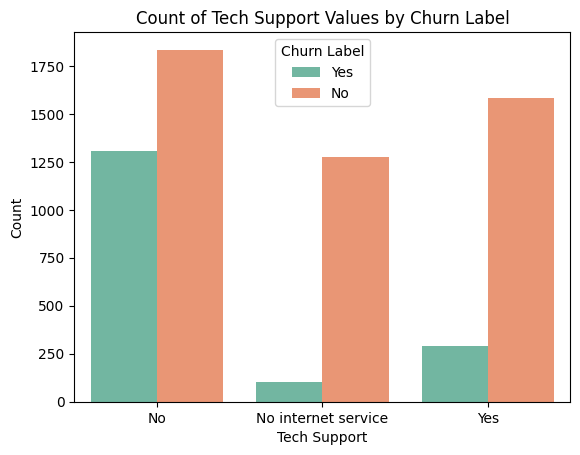

In [75]:
# Create a bar plot to show the count of Tech Support values against Churn Label
sns.countplot(x='Tech Support', hue='Churn Label', data=df, palette='Set2')

# Add titles and labels
plt.title('Count of Tech Support Values by Churn Label')
plt.xlabel('Tech Support')
plt.ylabel('Count')

# Show the plot
plt.show()

## Feature Engineering

### One-Hot Encoding

In [28]:
df = pd.get_dummies(df, columns=cat_list,drop_first=True)

In [29]:
# Separating Feature Matrix and Target vector
X,y = df.drop('Churn Label_Yes', axis=1), df['Churn Label_Yes']

### Feature Scaling

In [30]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 4. Early Modelling

In [32]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [33]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize KNN classifier
knn = KNeighborsClassifier()

# Define the hyperparameters and their corresponding values for GridSearch
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean']
}

# Use GridSearchCV to search for the best combination of hyperparameters
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')

# Train the model with GridSearch
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(f"Best Hyperparameters: {grid_search.best_params_}")

# Predict with the best model
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)

# Calculate accuracy
accuracy = knn.scor(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Best Hyperparameters: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}


AttributeError: 'KNeighborsClassifier' object has no attribute 'scor'